In [1]:
import math

from AntColony.aco import ACO, Graph
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from IPython.display import display
from ipywidgets import interact
%matplotlib inline

In [2]:
def distance(city1: dict, city2: dict):
    return math.sqrt((city1['x'] - city2['x']) ** 2 + (city1['y'] - city2['y']) ** 2)

In [3]:
def plot(paths,points):
    num_iters = 1
    x = []
    y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])
    plt.plot(x, y, 'co')
    a_scale = float(max(x)) / float(100)
    if num_iters > 1:
        for i in range(1, num_iters):
            xi = []
            yi = []
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]),
                      head_width=a_scale, color='r',
                      length_includes_head=True, ls='dashed',
                      width=0.001 / float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i + 1] - xi[i]), (yi[i + 1] - yi[i]),
                          head_width=a_scale, color='r', length_includes_head=True,
                          ls='dashed', width=0.001 / float(num_iters))
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width=a_scale,
              color='g', length_includes_head=True)
    for i in range(0, len(x) - 1):
        plt.arrow(x[i], y[i], (x[i + 1] - x[i]), (y[i + 1] - y[i]), head_width=a_scale,
                  color='g', length_includes_head=True)
    plt.xlim(min(x) * 1.1, max(x) * 1.1)
    plt.ylim(min(y) * 1.1, max(y) * 1.1)
    plt.show()


In [4]:
def plot_learning(history):
    plt.plot([i for i in range(len(history))], history)
    plt.show()

IntText(value=100, description='Шагов:')

IntText(value=10, description='Кол-во муравьев:')

FloatText(value=1.0, description='Альфа:')

FloatText(value=10.0, description='Бета:')

FloatText(value=0.5, description='RHO')

FloatText(value=10.0, description='Q')

Dropdown(description='Стратегия:', options=('Ant-cycle', 'Ant-quality', 'Ant-density'), value='Ant-cycle')

Checkbox(value=False, description='Случайная инициализация')

Button(description='Старт', style=ButtonStyle())

cost: 659.25204793845, path: [29, 27, 6, 5, 7, 35, 3, 4, 36, 42, 38, 37, 9, 15, 24, 0, 1, 2, 16, 10, 17, 18, 11, 12, 14, 13, 20, 21, 8, 19, 25, 26, 22, 23, 43, 44, 41, 30, 39, 40, 34, 31, 32, 33, 28]


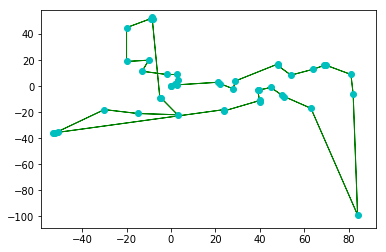

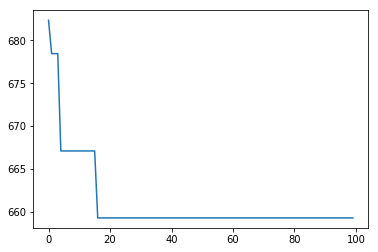

interactive(children=(IntSlider(value=1, description='step', min=1), Output()), _dom_classes=('widget-interact…

In [5]:
ants_count = widgets.IntText(
    value=10,
    description='Кол-во муравьев:',
    disabled=False
)
generations = widgets.IntText(
    value=100,
    description='Шагов:',
    disabled=False
)
alpha = widgets.FloatText(
    value=1,
    description='Альфа:',
    disabled=False
)
beta = widgets.FloatText(
    value=10,
    description='Бета:',
    disabled=False
)
rho = widgets.FloatText(
    value=0.5,
    description='RHO',
    disabled=False
)
q = widgets.FloatText(
    value=10,
    description='Q',
    disabled=False
)
strategy = widgets.Dropdown(
    options=['Ant-cycle','Ant-quality', 'Ant-density'],
    description='Стратегия:'
)
random_init = widgets.Checkbox(
    value=False,
    description='Случайная инициализация',
    disabled=False
)
start = widgets.Button(
    description='Старт'
)

def on_button_clicked(b):
    cities = []
    points = []
    if random_init.value:
        for i in range(50):
            point = (random.uniform(-1000,1000),random.uniform(-1000,1000))
            cities.append(dict(index=i, x=point[0], y=point[1]))
            points.append((point[0], point[1]))
    else:
        with open('coord.txt') as f:
            for line in f.readlines():
                city = line.split(' ')
                cities.append(dict(index=float(city[0]), x=float(city[1]), y=float(city[2])))
                points.append((float(city[1]), float(city[2])))
    cost_matrix = []
    rank = len(cities)
    for i in range(rank):
        row = []
        for j in range(rank):
            row.append(distance(cities[i], cities[j]))
        cost_matrix.append(row)
    aco = ACO(ants_count.value, generations.value, alpha.value, beta.value, rho.value, q.value, strategy.options.index(strategy.value))
    graph = Graph(cost_matrix, rank)
    path, cost = aco.solve(graph)
    print('cost: {}, path: {}'.format(cost, path))
    plot([path],points)
    plot_learning(aco.cost_history)
    def build_plot(step):
        plot([aco.path_history[step-1]],points)
    interact(build_plot, step=widgets.IntSlider(min=1, max=len(aco.path_history), step=1, value=1))
display(generations)
display(ants_count)
start.on_click(on_button_clicked)
display(alpha)
display(beta)
display(rho)
display(q)
display(strategy)
display(random_init)
display(start)
